In [1]:
import sys
import numpy as np
from scipy.stats import spearmanr
sys.path.insert(0,'..')
from targeting import *

In [2]:
np.random.seed(2)
n_rows = 100
n_proxies = 10
df = pd.DataFrame()
df['unique_id'] = range(n_rows)
df['consumption'] = np.random.rand(n_rows)*10
for proxy in range(n_proxies):
    df['proxy' + str(proxy)] = df['consumption'] + np.random.randint(size=n_rows, low=0, high=proxy+5)
df['weight'] = np.random.randint(10, 100, size=n_rows)
df.to_csv('../synthetic_data/targeting.csv', index=False)

In [3]:
targeting = Targeting('../configs/config_emily.yml')

In [4]:
# Tests for pearson and spearman
for proxy in range(n_proxies):
    
    cider_pearson = round(targeting.pearson('consumption', 'proxy' + str(proxy), weighted=False), 2)
    raw_pearson = round(np.corrcoef(df['consumption'], df['proxy' + str(proxy)])[0][1], 2)
    assert cider_pearson == raw_pearson
    
    cider_spearman = round(targeting.spearman('consumption', 'proxy' + str(proxy), weighted=False), 2)
    raw_spearman = round(spearmanr(df['consumption'], df['proxy' + str(proxy)])[0], 2)
    assert cider_pearson == raw_pearson


In [5]:
targeting.targeting_table('consumption', ['proxy' + str(i) for i in range(n_proxies)], 50, 20)

,Targeting Method,Pearson,Spearman,AUC (Threshold-Agnostic),Accuracy,Precision,Recall,AUC (Threshold-Specific)
0,proxy0,0.872165,0.881416,0.871828,0.70,1.00,0.40,0.9224
1,proxy1,0.868070,0.866463,0.866075,0.70,1.00,0.40,0.9596
2,proxy2,0.838683,0.815470,0.876187,0.70,1.00,0.40,0.8672
3,proxy3,0.749624,0.730405,0.791336,0.70,1.00,0.40,0.8760
4,proxy4,0.682615,0.687129,0.772392,0.64,0.85,0.34,0.8220
5,proxy5,0.686146,0.662034,0.764168,0.68,0.95,0.38,0.8372
6,proxy6,0.585782,0.550399,0.730382,0.60,0.75,0.30,0.7216
7,proxy7,0.534907,0.550987,0.697244,0.70,1.00,0.40,0.8308
8,proxy8,0.372739,0.321224,0.611019,0.56,0.65,0.26,0.6060
9,proxy9,0.548001,0.508923,0.715063,0.62,0.80,0.32,0.7420


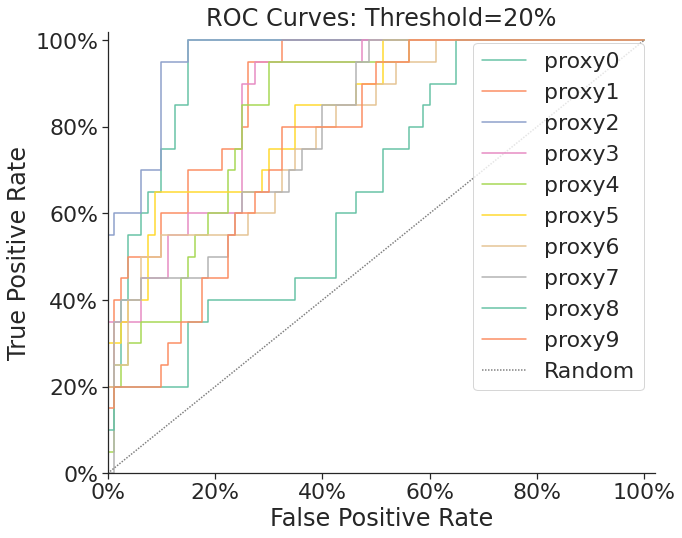

In [6]:
targeting.roc_curves('consumption', ['proxy' + str(i) for i in range(n_proxies)], p=20, weighted=False)

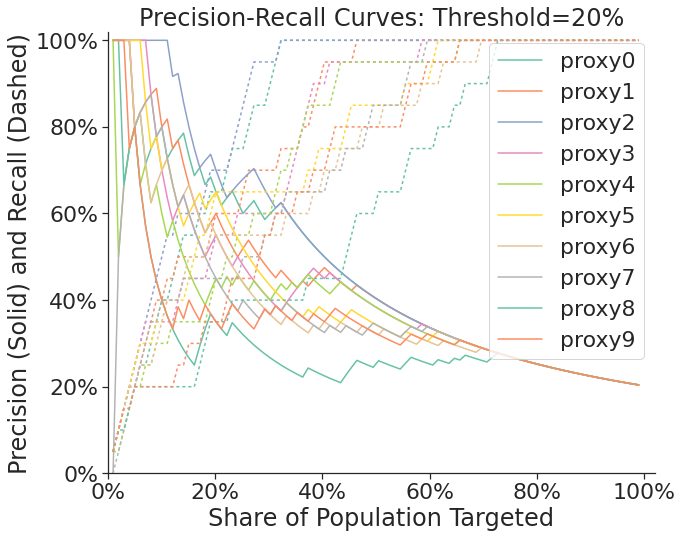

In [7]:
targeting.precision_recall_curves('consumption', ['proxy' + str(i) for i in range(n_proxies)], p=20,
                                  weighted=False)

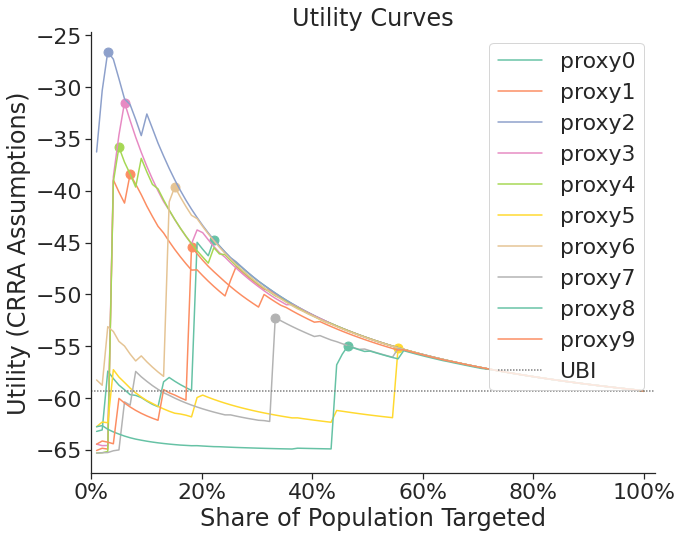

In [8]:
targeting.utility_curves('consumption', ['proxy' + str(i) for i in range(n_proxies)], .01, weighted=False)

In [9]:
targeting.utility_table('consumption', ['proxy' + str(i) for i in range(n_proxies)], .01, weighted=False)

,Proxy,Optimal Share of Population Targeted,Maximum Utility,Optimal Transfer Size
0,proxy0,22.214286,-44.723645,0.045455
1,proxy1,7.061224,-38.411890,0.142857
2,proxy2,3.020408,-26.588360,0.333333
3,proxy3,6.051020,-31.498943,0.166667
4,proxy4,5.040816,-35.786787,0.200000
5,proxy5,55.551020,-55.158966,0.018182
6,proxy6,15.142857,-39.623819,0.066667
7,proxy7,33.326531,-52.244664,0.030303
8,proxy8,46.459184,-54.975039,0.021739
9,proxy9,18.173469,-45.410082,0.055556
